
## 📘 **Dataset Description**

### 📊 **Source:**

* Downloaded from **Yahoo Finance** using `yfinance` Python library

### 🧾 **Stock Symbol:**

* `TATAMOTORS.NS` (Tata Motors Ltd, listed on NSE India)

### 📅 **Time Frame:**

* From: `2020-01-01`
* To: `2024-12-31`
* \~5 years of daily trading data

### 📁 **Features in the Dataset:**

| Column      | Description                                        |
| ----------- | -------------------------------------------------- |
| `Date`      | Trading date                                       |
| `Open`      | Price at market open                               |
| `High`      | Highest price on the day                           |
| `Low`       | Lowest price on the day                            |
| `Close`     | Price at market close (used for prediction)        |
| `Adj Close` | Adjusted closing price (includes dividends/splits) |
| `Volume`    | Number of shares traded                            |

---




## ⚙️ **Algorithm Details**

### 🧠 Model Type:

* **LSTM Neural Network** (a type of Recurrent Neural Network)


LSTM is specifically designed for **sequence prediction** — perfect for **time-series data** like stock prices because it can learn from historical trends and temporal dependencies.

---

## 🔧 **Model Architecture:**

| Layer        | Description                                      |
| ------------ | ------------------------------------------------ |
| LSTM(50)     | First LSTM layer with 50 units, returns sequence |
| Dropout(0.2) | Prevents overfitting                             |
| LSTM(60)     | Second LSTM layer                                |
| Dropout(0.3) |                                                  |
| LSTM(80)     | Third LSTM layer                                 |
| Dropout(0.4) |                                                  |
| LSTM(120)    | Final LSTM layer without `return_sequences`      |
| Dropout(0.5) |                                                  |
| Dense(1)     | Output layer predicting a single price value     |

> ⚙️ **Loss Function:** `Mean Squared Error`
> 🧪 **Optimizer:** `Adam`
> 🔁 **Epochs:** 20
> 📦 **Batch Size:** 32


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import yfinance as yf

In [31]:
start = '2020-01-01'
end = '2024-12-31'
stock ='TATAMOTORS.NS'
data = yf.download(stock,start,end)

C:\Users\kusar\AppData\Local\Temp\ipykernel_23664\1436066502.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [32]:
data.reset_index(inplace=True)

In [33]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,2020-01-01,181.748581,183.965628,180.911039,182.438326,25968357
1,2020-01-02,190.912369,191.848452,181.896384,182.290520,57289863
2,2020-01-03,188.301193,192.784543,186.478282,190.074819,47572728
3,2020-01-06,182.931000,188.202651,182.339796,188.202651,28621212
4,2020-01-07,181.994904,186.626065,179.630060,184.261221,34995035
...,...,...,...,...,...,...
1232,2024-12-23,716.043579,728.139592,711.581940,727.445547,9653868
1233,2024-12-24,729.825073,738.946660,716.341031,717.332506,12553555
1234,2024-12-26,734.484985,741.425313,729.279739,729.825039,9343210


In [34]:
moving_avg_100_days = data.Close.rolling(100).mean()

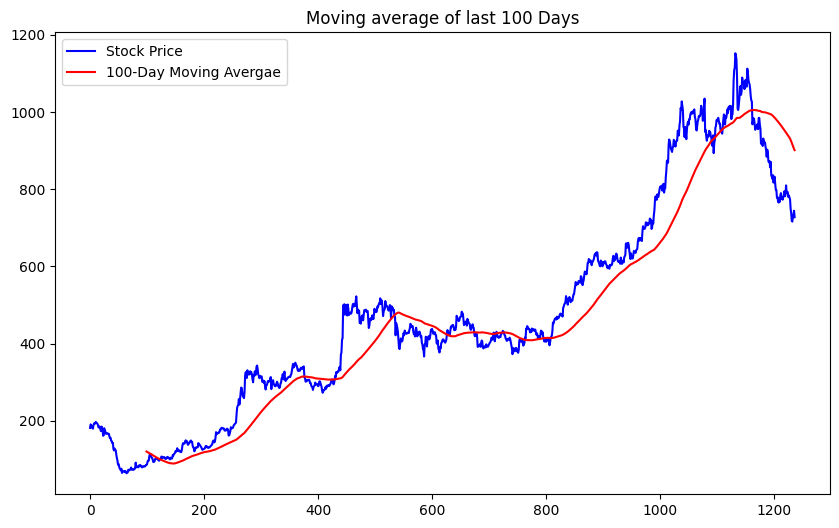

In [35]:
plt.figure(figsize=(10, 6))
plt.title("Moving average of last 100 Days")
plt.plot(data.Close,'b', label='Stock Price')
plt.plot(moving_avg_100_days,'r', label='100-Day Moving Avergae')
plt.legend()
plt.show()

In [36]:
moving_avg_200_days = data.Close.rolling(200).mean()


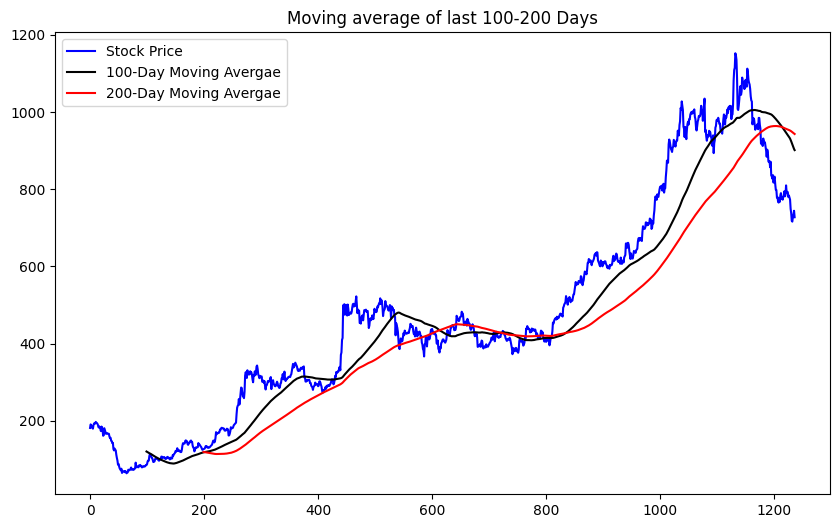

In [37]:
plt.figure(figsize=(10, 6))
plt.title("Moving average of last 100-200 Days")
plt.plot(data.Close,'b', label='Stock Price')
plt.plot(moving_avg_100_days,'black', label='100-Day Moving Avergae')
plt.plot(moving_avg_200_days,'r', label='200-Day Moving Avergae')
plt.legend()
plt.show()


## 📈 **Data Preprocessing Steps**

1. **Rolling Averages:**

   * 100-day and 200-day moving averages for trend visualization

2. **Train-Test Split:**

   * 80% for training, 20% for testing

3. **Normalization:**

   * Used `MinMaxScaler` to scale prices to \[0,1] range

4. **Sequence Generation:**

   * Created sequences of 100 time steps (previous 100 days) to predict the next day's price

---

In [38]:
data.dropna(inplace=True)

In [39]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [40]:
data_train.shape[0]

989

In [41]:
data_test.shape[0]

248

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)

In [43]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [44]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [45]:
x,y = np.array(x),np.array(y)

In [46]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [47]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [48]:
model.fit(x,y,epochs = 20,batch_size=32,verbose=1)

Epoch 1/20
28/28 [==============================] - 8s 148ms/step - loss: 0.0936
Epoch 2/20
28/28 [==============================] - 4s 145ms/step - loss: 0.0161
Epoch 3/20
28/28 [==============================] - 4s 142ms/step - loss: 0.0114
Epoch 4/20
28/28 [==============================] - 4s 142ms/step - loss: 0.0110
Epoch 5/20
28/28 [==============================] - 4s 142ms/step - loss: 0.0118
Epoch 6/20
28/28 [==============================] - 4s 143ms/step - loss: 0.0093
Epoch 7/20
28/28 [==============================] - 4s 144ms/step - loss: 0.0089
Epoch 8/20
28/28 [==============================] - 4s 139ms/step - loss: 0.0095
Epoch 9/20
28/28 [==============================] - 4s 134ms/step - loss: 0.0076
Epoch 10/20
28/28 [==============================] - 4s 134ms/step - loss: 0.0077
Epoch 11/20
28/28 [==============================] - 4s 136ms/step - loss: 0.0082
Epoch 12/20
28/28 [==============================] - 4s 134ms/step - loss: 0.0074
Epoch 13/20
28/28 [======

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [50]:
past_100_days = data_train.tail(100)


In [51]:
data_test = pd.concat([past_100_days,data_test],ignore_index=True)

In [52]:
data_test_scale = scaler.fit_transform(data_test)

In [53]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [54]:
y_predict = model.predict(x)

8/8 [==============================] - 1s 44ms/step


In [55]:
scale =1/scaler.scale_

In [56]:
y_predict = y_predict*scale

In [57]:
y = y*scale

--
## 📊 **Evaluation & Visualization:**

* Plotted **predicted vs. actual prices** on test set
* Used LSTM to predict future closing prices
* Visualized moving averages and real prices for trend tracking

---

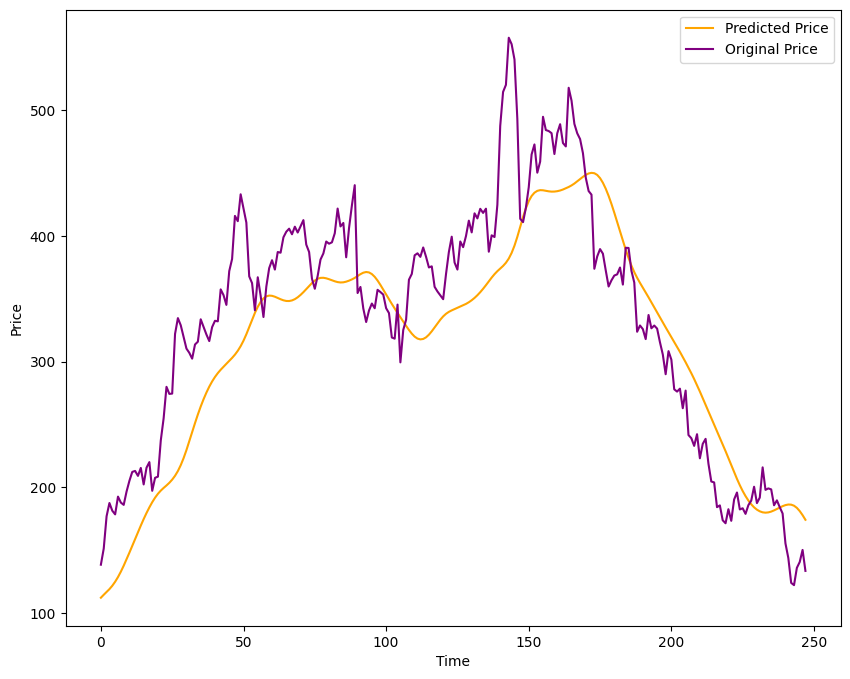

In [58]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'orange', label = 'Predicted Price')
plt.plot(y,'purple',label= 'Original Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation Metrics
mae = mean_absolute_error(y, y_predict)
mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_predict)

print("📊 Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


📊 Evaluation Metrics:
MAE (Mean Absolute Error): 42.93
MSE (Mean Squared Error): 2710.94
RMSE (Root Mean Squared Error): 52.07
R² Score: 0.7260


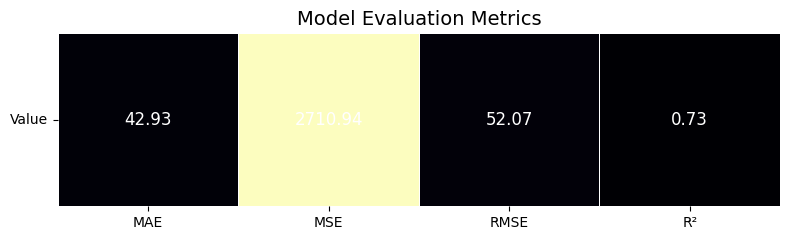

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Your metric values (replace with actuals)
metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R²': r2
}

# Create DataFrame
df = pd.DataFrame(metrics, index=["Value"])

# Plot heatmap with custom color map
plt.figure(figsize=(8, 2.5))
sns.heatmap(df,
            annot=True,
            fmt=".2f",
            cmap="magma",  # 🔁 Change this line to try different color styles
            linewidths=0.5,
            cbar=False,
            annot_kws={"fontsize": 12, "color": "white"})  # white text on dark bg

plt.title("Model Evaluation Metrics", fontsize=14, color='black')
plt.yticks(rotation=0, color='black')
plt.xticks(rotation=0, color='black')
plt.gca().set_facecolor("black")  # background color behind heatmap
plt.tight_layout()
plt.show()


## 💾 **Model Export:**

Saved model as:

```python
model.save('Stock_Prediction_Model.keras')
```

You can later load it with:

```python
from keras.models import load_model
model = load_model('Stock_Prediction_Model.keras')
```

---

In [ ]:
model.save('Stock_Prediction_Model.keras')


## 🧠 Summary

This project shows how **deep learning (LSTM)** can be applied to real-world stock data to **forecast prices** based on historical trends. The model can be extended or improved with:

* Additional features: RSI, MACD, Volume
* Attention layers or GRU
* Real-time prediction APIs

---